In [1]:
from typing import Tuple

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, validation_curve, learning_curve

In [2]:
data = pd.read_csv('./ieee-fraud-detection/data.csv')

In [3]:
print('Row: {}, columns: {}'.format(*data.shape))

Row: 100000, columns: 394


In [ ]:
data.head(n=2)

In [ ]:
# no_nan_list = []
# for i in range(len(data_hw.isna().sum())):
#                if data_hw.isna().sum()[i] == 0:
#                    no_nan_list.append(data_hw.columns[i])
                
# print(len(no_nan_list))

In [4]:
columns = ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']

In [5]:
data_hw = data[columns]
data_hw.head(n=2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,C1,C2,C3,C4,...,V282,V283,V288,V289,V296,V300,V301,V313,V314,V315
0,2987000,0,86400,68.5,W,13926,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
x_train, x_valid = train_test_split(
    data_hw.drop(columns=['TransactionID', 'isFraud', 'ProductCD'], axis=1), train_size=0.7, shuffle=True, random_state=1
)

y_train, y_valid = train_test_split(
    data_hw['isFraud'], train_size=0.7, shuffle=True, random_state=1
)

print('X_train rows: {}, columns: {}'.format(*x_train.shape))
print('X_valid rows: {}, columns: {}'.format(*x_valid.shape))

X_train rows: 70000, columns: 72
X_valid rows: 30000, columns: 72


In [7]:
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [8]:
train_score = roc_auc_score(y_train, model.predict_proba(x_train)[:,1])
valid_score = roc_auc_score(y_valid, model.predict_proba(x_valid)[:,1])

print('train_score: {}, valid_score {}'.format(train_score, valid_score))

train_score: 1.0, valid_score 0.7307758047789912


In [10]:
importance = pd.DataFrame({
    'features': x_train.columns,
    'importance': model.feature_importances_
})

importance = importance.sort_values(by='importance', ascending=False)
importance = importance.reset_index(drop=True)

importance

,features,importance
0,TransactionDT,0.163306
1,card1,0.129174
2,TransactionAmt,0.089962
3,C1,0.070348
4,C13,0.058853
...,...,...
67,V118,0.000000
68,V114,0.000000
69,V107,0.000000
70,V101,0.000000


In [35]:
train_scores, valid_scores = validation_curve(
    X=x_train,
    y=y_train,
    estimator= DecisionTreeClassifier(random_state=1),
    param_range=[-1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    param_name='max_depth',
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
)

In [36]:
train_scores.shape[0]

15

In [37]:
train_scores

array([[       nan,        nan,        nan,        nan,        nan],
       [0.68155682, 0.69858257, 0.6871069 , 0.68597058, 0.68060311],
       [0.73990016, 0.75395593, 0.74602613, 0.74657011, 0.73978945],
       [0.76524601, 0.79175149, 0.76797595, 0.7860416 , 0.78486431],
       [0.79765361, 0.8059977 , 0.80201199, 0.80367561, 0.80433679],
       [0.80154282, 0.81143283, 0.81128207, 0.8128971 , 0.81260329],
       [0.81502766, 0.82109178, 0.82745362, 0.82303826, 0.82196339],
       [0.83016063, 0.84234994, 0.84034743, 0.8373083 , 0.8360453 ],
       [0.84461035, 0.85751338, 0.85095557, 0.85113161, 0.84432569],
       [0.85310491, 0.86828861, 0.85946382, 0.86197959, 0.85888538],
       [0.86401767, 0.88191863, 0.8762466 , 0.87725918, 0.86560964],
       [0.88030815, 0.89364725, 0.89094479, 0.89491171, 0.8847481 ],
       [0.89112578, 0.9061653 , 0.90381431, 0.90734368, 0.89475438],
       [0.90332582, 0.92060125, 0.91552648, 0.92187638, 0.90951334],
       [0.91772653, 0.93430778, 0.

In [38]:
np.mean(train_scores, axis=1)

array([       nan, 0.686764  , 0.74524835, 0.77917587, 0.80273514,
       0.80995162, 0.82171494, 0.83724232, 0.84970732, 0.86034446,
       0.87301034, 0.888912  , 0.90064069, 0.91416865, 0.92738443])

In [39]:
def plot_validation_curves(train_scores: np.array,
                           valid_scores: np.array,
                           figsize: Tuple[int, int] = (8, 8)
                          ):
    """
    Визуализация процесса настройки гиперпараметра
    алгоритма машинного обучения. Визуализируется значение
    метрики качества на обучащей и тестовой части данных, на
    валидационной части данных и доверительные интервалы.

    Parameters
    ----------
    train_scores: np.array
        Значения метрики качества на обучающей выборке.

    valid_scores: np.array
        Значения метрики качества на валидационной выборке.

    """
    fig = plt.figure(figsize=figsize)

    #plt.subplot(121)
    plt.title("Validation Curves", size=15)
    plt.plot(
        range(train_scores.shape[0]),
        np.mean(train_scores, axis=1),
        label="train",
        linewidth=3,
        marker="s"
    )
    plt.fill_between(
        x=range(train_scores.shape[0]),
        y1=np.mean(train_scores, axis=1)-np.std(train_scores, axis=1),
        y2=np.mean(train_scores, axis=1)+np.std(train_scores, axis=1),
        alpha=0.25
    )
    #plt.subplot(121)
    plt.plot(
        range(train_scores.shape[0]),
        np.mean(valid_scores, axis=1),
        label="valid",
        linewidth=3,
        marker="s"
    )
    plt.fill_between(
        x=range(train_scores.shape[0]),
        y1=np.mean(valid_scores, axis=1)-np.std(valid_scores, axis=1),
        y2=np.mean(valid_scores, axis=1)+np.std(valid_scores, axis=1),
        alpha=0.25
    )
    plt.legend(loc="best", fontsize=14)
    plt.ylabel("roc_auc", size=15)

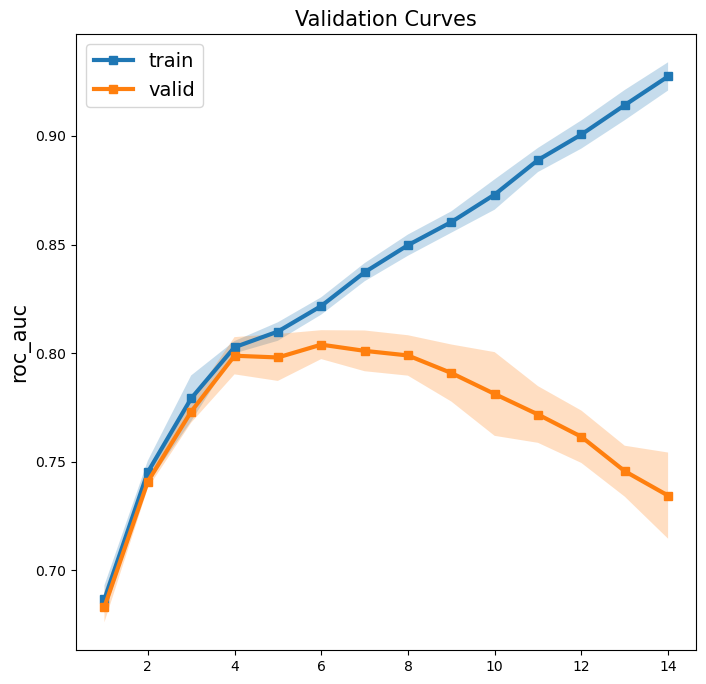

In [40]:
plot_validation_curves(train_scores, valid_scores)

In [44]:
train_scores, valid_scores = validation_curve(
    X=x_train,
    y=y_train,
    estimator = DecisionTreeClassifier(max_depth=7, random_state=1),
    param_range = [1,5,10,25,50,100,250],
    param_name = 'min_samples_leaf',
    scoring = 'roc_auc',
    n_jobs= -1,
    cv=5,
)

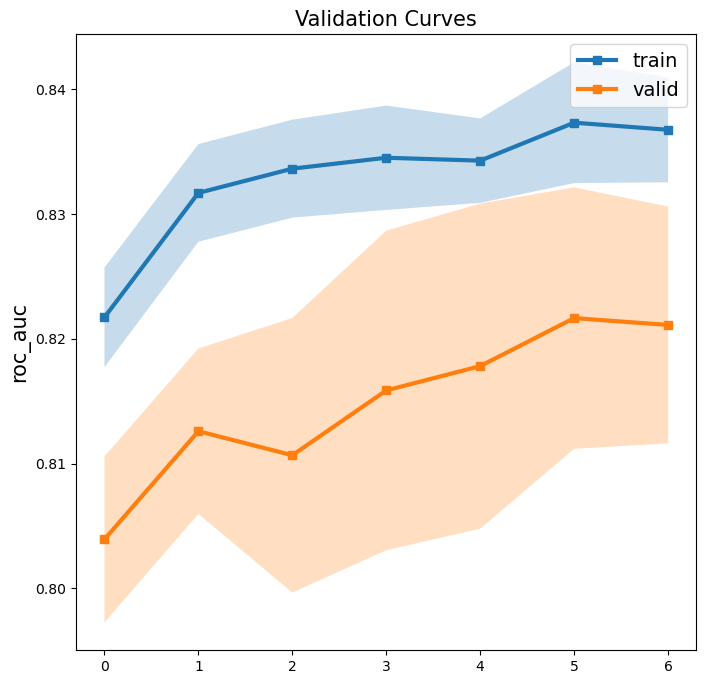

In [45]:
plot_validation_curves(train_scores, valid_scores)

In [46]:
train_size, train_scores, valid_scores = learning_curve(
    X=x_train,
    y=y_train,
    estimator = DecisionTreeClassifier(max_depth=7, min_samples_leaf=100, random_state=1),
    scoring = 'roc_auc',
    n_jobs = -1,
    cv=5
)

Text(0, 0.5, 'roc_auc')

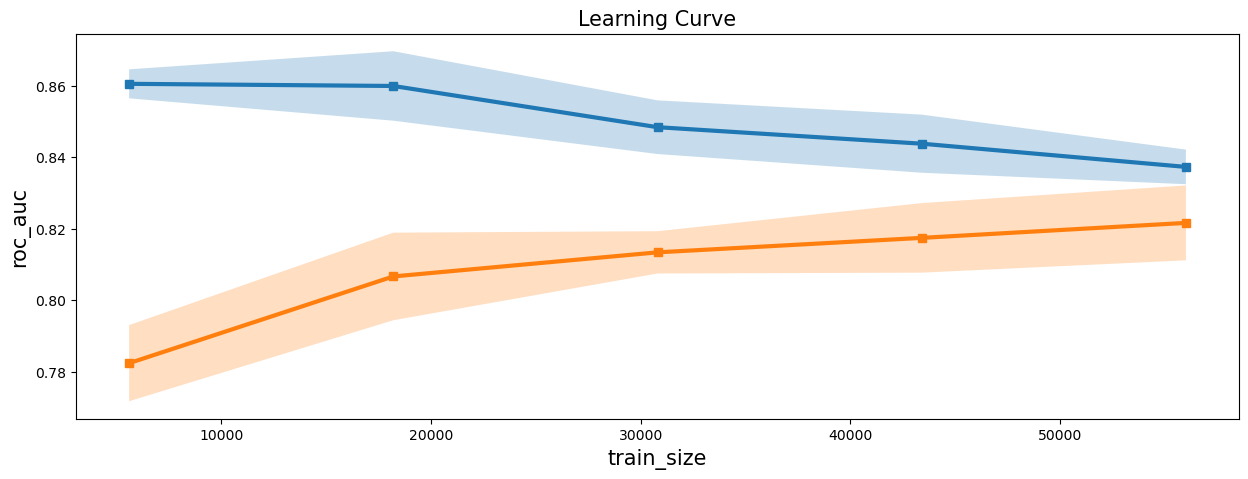

In [51]:
fig = plt.figure(figsize=(15,5))
plt.plot(train_size, np.mean(train_scores, axis=1), marker='s', linewidth=3)
plt.fill_between(
    x=train_size,
    y1=np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
    y2=np.mean(train_scores, axis=1) + np.std(train_scores, axis=1),
    alpha=.25
)

plt.plot(train_size, np.mean(valid_scores, axis=1), marker='s', linewidth=3)
plt.fill_between(
    x=train_size,
    y1=np.mean(valid_scores, axis=1) - np.std(valid_scores, axis=1),
    y2=np.mean(valid_scores, axis=1) + np.std(valid_scores, axis=1),
    alpha=.25
)

plt.title('Learning Curve', size=15) 
plt.xlabel('train_size', size=15)
plt.ylabel('roc_auc', size=15)